TRAFFIC ANALYSIS - DAY-WISE, MONTH-WISE, YEAR-WISE

###### Day-wise: Given a specific date, there will be options to plot the traffic throughout entire NYC state, or plotting it borough-wise. Additional details such as most frequent PU and DO zones, most frequented trip route, daily aggregate drivers pay, daily aggregate miles covered, top-n busiest times during day (k-means clustering)

In [ ]:
!pip install pyarrow fastparquet geopandas contextily

./Dataset/2021.parquet


C:\Users\alosh\AppData\Local\Temp\ipykernel_10164\3247926148.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour'] = filtered_df['pickup_datetime'].dt.hour


Most common pickup zone: Mount Hope
Most common drop-off zone: East Tremont
Top-3 Most Common Routes:
             PUZone         DOZone  count
9153  East New York  East New York   1479
4107       Canarsie       Canarsie    874
2554   Borough Park   Borough Park    780
Top-3 Least Common Routes:
                  PUZone                    DOZone  count
16867  LaGuardia Airport  South Beach/Dongan Hills      1
14793          Hudson Sq                Bath Beach      1
14798          Hudson Sq              Bedford Park      1
Daily Aggregate Revenue on 2021-12-31: $2047.32
Daily Aggregate Miles Covered on 2021-12-31: 631.85 miles


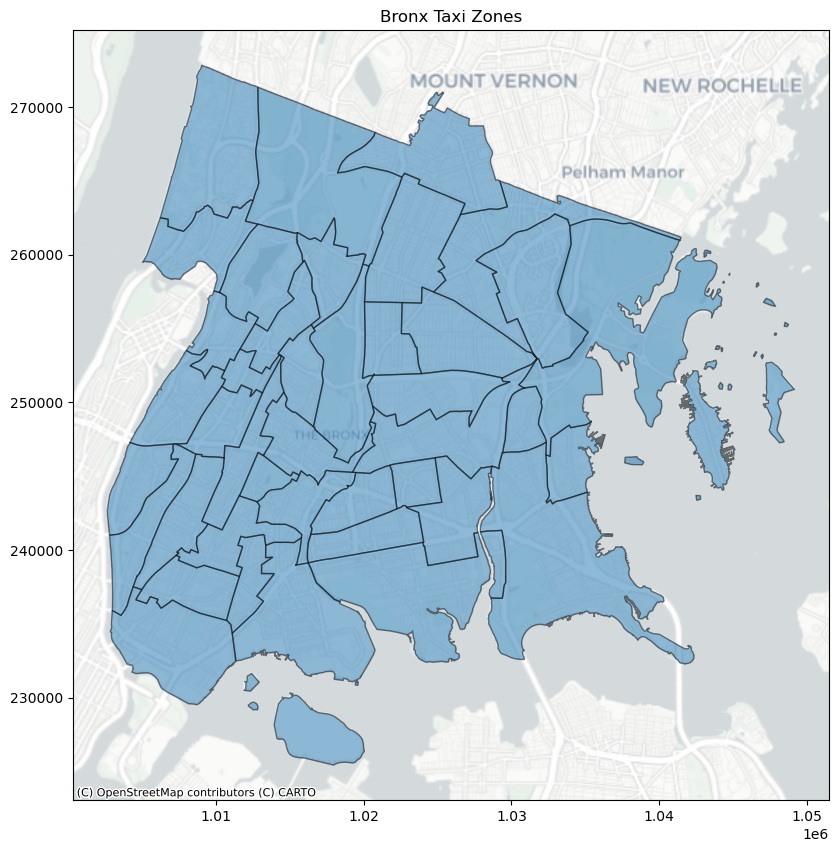

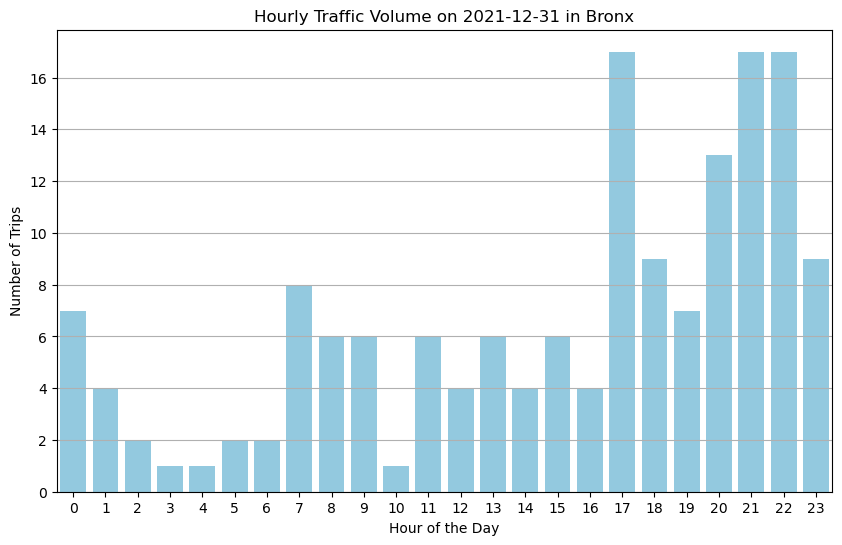

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
import geopandas as gpd

gdf = gpd.read_file("./taxi_zones.zip")

def traffic_analysis(date, borough=None, brand=None, k=3):
    year = pd.to_datetime(date).year
    def plot(df, date, borough, k):
        df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
        # df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

        if borough:
            filtered_df = df[ (df['pickup_datetime'].dt.date == pd.to_datetime(date).date()) & (df['PUBorough'] == borough) ]
        else:
            filtered_df = df[df['pickup_datetime'].dt.date == pd.to_datetime(date).date()]
        daily_aggregate_driver_pay = filtered_df['driver_pay'].sum()
        daily_aggregate_miles = filtered_df['trip_miles'].sum()
        
        filtered_df['hour'] = filtered_df['pickup_datetime'].dt.hour
        hourly_traffic = filtered_df.groupby('hour').size().reset_index(name='trip_counts')
        
        
        most_common_pu_zone = filtered_df['PUZone'].value_counts().idxmax()
        most_common_do_zone = filtered_df['DOZone'].value_counts().idxmax()

        # Top-k most common routes
        most_common_routes = df.groupby(['PUZone', 'DOZone'])['trip_miles'].size().reset_index(name='count').sort_values(by='count', ascending=False).head(k)
        # Top-k least common routes
        least_common_routes = df.groupby(['PUZone', 'DOZone'])['trip_miles'].size().reset_index(name='count').sort_values(by='count').head(k)
        print(f"Most common pickup zone: {most_common_pu_zone}")
        print(f"Most common drop-off zone: {most_common_do_zone}")
        print(f"Top-{k} Most Common Routes:\n{most_common_routes}")
        print(f"Top-{k} Least Common Routes:\n{least_common_routes}")
        print(f"Daily Aggregate Revenue on {date}: ${daily_aggregate_driver_pay:.2f}")
        print(f"Daily Aggregate Miles Covered on {date}: {daily_aggregate_miles:.2f} miles")

        if borough is None:
            fig, ax = plt.subplots(figsize=(20, 20))
            gdf.plot(ax=ax, alpha=0.4, edgecolor='k')
            ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
            plt.show()
        else:
            borough_zones = gdf[gdf['borough'] == borough]
            fig, ax = plt.subplots(figsize=(10, 10))
            borough_zones.plot(ax=ax, alpha=0.5, edgecolor='k')
            ctx.add_basemap(ax, crs=borough_zones.crs.to_string(), source=ctx.providers.CartoDB.Positron)
            ax.set_title(f"{borough} Taxi Zones")
            plt.show()

        plt.figure(figsize=(10, 6))
        sns.barplot(data=hourly_traffic, x='hour', y='trip_counts', color='skyblue')
        plt.title(f'Hourly Traffic Volume on {date} {"in " + borough if borough else "New York State"}')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Number of Trips')
        plt.xticks(range(0, 24))
        plt.grid(axis='y')
        plt.show()

    if brand == 'Uber':
        file_path = f"./Dataset/Uber_{year}.parquet"
    elif brand == 'Lyft':
        file_path = f"./Dataset/Lyft_{year}.parquet"
    else:
        file_path = f"./Dataset/{year}.parquet"
    print(file_path)
    df = pd.read_parquet(file_path, engine='pyarrow')

    plot(df, date, borough, k)

# format: traffic_analysis(date, borough=None, brand=None, k=3)
traffic_analysis('2021-12-31', 'Bronx')

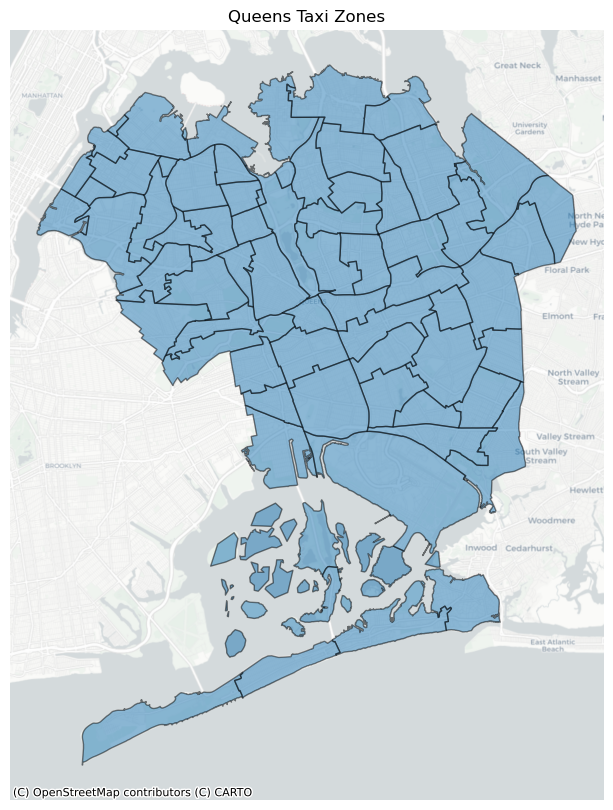

C:\Users\alosh\AppData\Local\Temp\ipykernel_10164\36061855.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour'] = filtered_df['pickup_datetime'].dt.hour


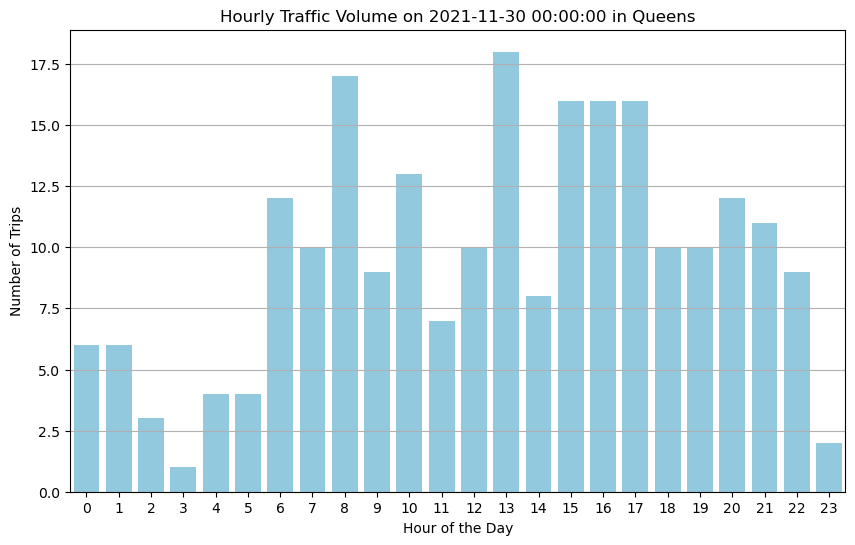

Most common pickup zone: LaGuardia Airport
Most common drop-off zone: Elmhurst
Top-3 Most Common Routes:
             PUZone         DOZone  count
9153  East New York  East New York   1479
4107       Canarsie       Canarsie    874
2554   Borough Park   Borough Park    780
Top-3 Least Common Routes:
                  PUZone                    DOZone  count
16867  LaGuardia Airport  South Beach/Dongan Hills      1
14793          Hudson Sq                Bath Beach      1
14798          Hudson Sq              Bedford Park      1
Aggregate Revenue from 2021-11-30 00:00:00 to 2021-11-30 00:00:00: $4112.00
Aggregate Miles Covered from 2021-11-30 00:00:00 to 2021-11-30 00:00:00: 1152.92 miles


In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx

gdf = gpd.read_file("./taxi_zones.zip")

def traffic_analysis_2(start_date, end_date=None, borough=None, brand=None, k=3):
    def plot(df, start, end, borough, k):
        df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='mixed')
        if (start != end):
            if borough:
                filtered_df = df[(df['pickup_datetime'] >= start) & 
                                (df['pickup_datetime'] <= end) &
                                (df['PUBorough'] == borough)]
            else:
                filtered_df = df[(df['pickup_datetime'] >= start) & 
                                (df['pickup_datetime'] <= end)]
        elif (start == end):
            if borough:
                filtered_df = df[ (df['pickup_datetime'].dt.date == pd.to_datetime(start).date()) & (df['PUBorough'] == borough) ]
            else:
                filtered_df = df[df['pickup_datetime'].dt.date == pd.to_datetime(end).date()]
        daily_aggregate_driver_pay = filtered_df['driver_pay'].sum()
        daily_aggregate_miles = filtered_df['trip_miles'].sum()

        if borough is None:
            fig, ax = plt.subplots(figsize=(20, 20))
            gdf.plot(ax=ax, alpha=0.4, edgecolor='k')
            ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
            ax.axis('off')
            plt.show()
        else:
            borough_zones = gdf[gdf['borough'] == borough]
            fig, ax = plt.subplots(figsize=(10, 10))
            borough_zones.plot(ax=ax, alpha=0.5, edgecolor='k')
            ctx.add_basemap(ax, crs=borough_zones.crs.to_string(), source=ctx.providers.CartoDB.Positron)
            ax.set_title(f"{borough} Taxi Zones")
            ax.axis('off')
            plt.show()
        
        if end != start:
            daily_traffic = filtered_df.groupby(filtered_df['pickup_datetime'].dt.date).size().reset_index(name='trip_counts')
            plt.figure(figsize=(10, 6))
            sns.barplot(data=daily_traffic, x='pickup_datetime', y='trip_counts', color='skyblue')
            plt.title(f'Daily Traffic Volume from {start.date()} to {end.date()} {"in " + borough if borough else "New York State"}')
            plt.xlabel('Date')
            plt.ylabel('Number of Trips')
            plt.xticks(rotation=45)
            plt.grid(axis='y')
            plt.show()
        elif end == start:
            filtered_df['hour'] = filtered_df['pickup_datetime'].dt.hour
            hourly_traffic = filtered_df.groupby('hour').size().reset_index(name='trip_counts')
            plt.figure(figsize=(10, 6))
            sns.barplot(data=hourly_traffic, x='hour', y='trip_counts', color='skyblue')
            plt.title(f'Hourly Traffic Volume on {start.date()} {"in " + borough if borough else "New York State"}')
            plt.xlabel('Hour of the Day')
            plt.ylabel('Number of Trips')
            plt.xticks(range(0, 24))
            plt.grid(axis='y')
            plt.show()
        
        most_common_pu_zone = filtered_df['PUZone'].value_counts().idxmax()
        most_common_do_zone = filtered_df['DOZone'].value_counts().idxmax()

        most_common_routes = df.groupby(['PUZone', 'DOZone'])['trip_miles'].size().reset_index(name='count').sort_values(by='count', ascending=False).head(k)
        least_common_routes = df.groupby(['PUZone', 'DOZone'])['trip_miles'].size().reset_index(name='count').sort_values(by='count').head(k)
        
        print(f"Most common pickup zone: {most_common_pu_zone}")
        print(f"Most common drop-off zone: {most_common_do_zone}")
        print(f"Top-{k} Most Common Routes:\n{most_common_routes}")
        print(f"Top-{k} Least Common Routes:\n{least_common_routes}")
        if end!=start:
            print(f"Aggregate Revenue on {start.date()} to {end.date()}: ${daily_aggregate_driver_pay:.2f}")
            print(f"Aggregate Miles Covered on {start.date()} to {end.date()}: {daily_aggregate_miles:.2f} miles")
        elif end==start:
            print(f"Aggregate Revenue on {start.date()}: ${daily_aggregate_driver_pay:.2f}")
        print(f"Aggregate Miles Covered on {start.date()}: {daily_aggregate_miles:.2f} miles")

    if end_date is None:
        start = pd.to_datetime(start_date)
        end=start
    else:
        start = pd.to_datetime(start_date)
        end = pd.to_datetime(end_date)

    year = start.year

    if end.year != year:
        df1 = pd.read_parquet(f"./Dataset/{year}.parquet", engine='pyarrow')
        df2 = pd.read_parquet(f"./Dataset/{end.year}.parquet", engine='pyarrow')
        df = pd.concat([df1, df2], ignore_index=True)
    else:
        if brand == 'Uber':
            file_path = f"./Dataset/Uber_{year}.parquet"
        elif brand == 'Lyft':
            file_path = f"./Dataset/Lyft_{year}.parquet"
        else:
            file_path = f"./Dataset/{year}.parquet"
        
        df = pd.read_parquet(file_path, engine='pyarrow')
        
    plot(df, start, end, borough, k)

# format: traffic_analysis(start_date, end_date=None, borough=None, brand=None, k=3)
traffic_analysis_2('2021-11-30', None, 'Queens')